In [471]:
import numpy as np 
import pandas as pd 
import seaborn as sns #导入可视化库
import matplotlib.pyplot as plt
%matplotlib inline

# 设置绘图大小
plt.style.use({'figure.figsize':(25,20)})

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号


In [472]:
# 读取数据
df=pd.read_csv('链家.csv',encoding='ANSI')

# 1.数据预处理

In [473]:
# 数据增加行标题
df.columns=['介绍','位置','情况','VR看房','总价','单价']
# 删除介绍和VR看房列
df.drop(columns = '介绍', inplace = True)
df.head()

,位置,情况,VR看房,总价,单价
0,北分厂 -海淀北部新区,2室1厅 | 51.1平米 | 南 北 | 简装 | 底层(共5层) | 1980年建 | 板楼,"近地铁,VR看装修,房本满五年,随时看房",395万,"77,300元/平"
1,领秀新硅谷2号院 -西二旗,2室2厅 | 115.1平米 | 南 北 | 精装 | 顶层(共5层) | 2009年建 | 板楼,"VR房源,房本满五年,随时看房",1330万,"115,552元/平"
2,铁东小区 -军博,3室1厅 | 69.3平米 | 南 北 | 毛坯 | 顶层(共6层) | 板楼,"近地铁,VR看装修,房本满五年,随时看房",690万,"99,568元/平"
3,远大园五区 -世纪城,3室2厅 | 135.9平米 | 西南 东北 | 简装 | 低楼层(共16层) | 2001...,"VR看装修,房本满五年,随时看房",1560万,"114,791元/平"
4,百旺茉莉园 -西北旺,3室2厅 | 129.1平米 | 南 北 | 简装 | 中楼层(共5层) | 板楼,"近地铁,VR房源,房本满五年",1293万,"100,155元/平"


In [474]:
# 是否包含地铁   

df['VR看房']=df['VR看房'].str.contains('近地铁')
df['VR看房']=df['VR看房'].astype(int)
df.rename(columns={'VR看房':'地铁'},inplace=True)
df.head()



,位置,情况,地铁,总价,单价
0,北分厂 -海淀北部新区,2室1厅 | 51.1平米 | 南 北 | 简装 | 底层(共5层) | 1980年建 | 板楼,1,395万,"77,300元/平"
1,领秀新硅谷2号院 -西二旗,2室2厅 | 115.1平米 | 南 北 | 精装 | 顶层(共5层) | 2009年建 | 板楼,0,1330万,"115,552元/平"
2,铁东小区 -军博,3室1厅 | 69.3平米 | 南 北 | 毛坯 | 顶层(共6层) | 板楼,1,690万,"99,568元/平"
3,远大园五区 -世纪城,3室2厅 | 135.9平米 | 西南 东北 | 简装 | 低楼层(共16层) | 2001...,0,1560万,"114,791元/平"
4,百旺茉莉园 -西北旺,3室2厅 | 129.1平米 | 南 北 | 简装 | 中楼层(共5层) | 板楼,1,1293万,"100,155元/平"


In [475]:
# 把情况这一列拆分并重命名
df=pd.concat([df, df['情况'].str.split('|', expand=True)], axis=1).drop('情况', axis=1)
df.rename(columns={0: '户型', 1: '建筑面积', 2:'朝向', 3:'装修', 4:'楼层'}, inplace=True)
df.drop(columns=[5,6,7],inplace=True)

In [476]:
# 把位置拆分
df=pd.concat([df, df['位置'].str.split('-', expand=True)], axis=1).drop('位置', axis=1)
df.rename(columns={0:'小区'},inplace=True)
df.drop(columns=1,inplace=True)
df.head()

,地铁,总价,单价,户型,建筑面积,朝向,装修,楼层,小区
0,1,395万,"77,300元/平",2室1厅,51.1平米,南 北,简装,底层(共5层),北分厂
1,0,1330万,"115,552元/平",2室2厅,115.1平米,南 北,精装,顶层(共5层),领秀新硅谷2号院
2,1,690万,"99,568元/平",3室1厅,69.3平米,南 北,毛坯,顶层(共6层),铁东小区
3,0,1560万,"114,791元/平",3室2厅,135.9平米,西南 东北,简装,低楼层(共16层),远大园五区
4,1,1293万,"100,155元/平",3室2厅,129.1平米,南 北,简装,中楼层(共5层),百旺茉莉园


In [477]:
# 处理户型
# 抽取室厅卫
df[['室','厅']]=df['户型'].str.extract('(\d+)室(\d+)厅')
# 正则匹配表达式
print(type(df['户型']))
df.head()
# 室厅类型卫string类型
df['室']=df['室'].astype(float)
df['厅']=df['厅'].astype(float)
df.drop(columns='户型', inplace=True)

<class 'pandas.core.series.Series'>


In [478]:
df.head()

,地铁,总价,单价,建筑面积,朝向,装修,楼层,小区,室,厅
0,1,395万,"77,300元/平",51.1平米,南 北,简装,底层(共5层),北分厂,2.0,1.0
1,0,1330万,"115,552元/平",115.1平米,南 北,精装,顶层(共5层),领秀新硅谷2号院,2.0,2.0
2,1,690万,"99,568元/平",69.3平米,南 北,毛坯,顶层(共6层),铁东小区,3.0,1.0
3,0,1560万,"114,791元/平",135.9平米,西南 东北,简装,低楼层(共16层),远大园五区,3.0,2.0
4,1,1293万,"100,155元/平",129.1平米,南 北,简装,中楼层(共5层),百旺茉莉园,3.0,2.0


In [479]:
# 处理建筑面积，去除平米
df['建筑面积']=df['建筑面积'].map(lambda e: e.replace('平米',' '))
df['建筑面积']=df['建筑面积'].astype(float)
df.head()

,地铁,总价,单价,建筑面积,朝向,装修,楼层,小区,室,厅
0,1,395万,"77,300元/平",51.1,南 北,简装,底层(共5层),北分厂,2.0,1.0
1,0,1330万,"115,552元/平",115.1,南 北,精装,顶层(共5层),领秀新硅谷2号院,2.0,2.0
2,1,690万,"99,568元/平",69.3,南 北,毛坯,顶层(共6层),铁东小区,3.0,1.0
3,0,1560万,"114,791元/平",135.9,西南 东北,简装,低楼层(共16层),远大园五区,3.0,2.0
4,1,1293万,"100,155元/平",129.1,南 北,简装,中楼层(共5层),百旺茉莉园,3.0,2.0


In [480]:
# 处理总价，总价去除万
df['总价']=df['总价'].map(lambda e: e.replace('万',' '))
df['总价']=df['总价'].astype(float)
df.head()

,地铁,总价,单价,建筑面积,朝向,装修,楼层,小区,室,厅
0,1,395.0,"77,300元/平",51.1,南 北,简装,底层(共5层),北分厂,2.0,1.0
1,0,1330.0,"115,552元/平",115.1,南 北,精装,顶层(共5层),领秀新硅谷2号院,2.0,2.0
2,1,690.0,"99,568元/平",69.3,南 北,毛坯,顶层(共6层),铁东小区,3.0,1.0
3,0,1560.0,"114,791元/平",135.9,西南 东北,简装,低楼层(共16层),远大园五区,3.0,2.0
4,1,1293.0,"100,155元/平",129.1,南 北,简装,中楼层(共5层),百旺茉莉园,3.0,2.0


In [481]:
# 处理单价单价去除元/平
df['单价']=df['单价'].map(lambda e: e.replace('元/平',' '))
df['单价']=df['单价'].map(lambda e: e.replace(',',''))
df['单价']=df['单价'].astype(float)
df.head()


,地铁,总价,单价,建筑面积,朝向,装修,楼层,小区,室,厅
0,1,395.0,77300.0,51.1,南 北,简装,底层(共5层),北分厂,2.0,1.0
1,0,1330.0,115552.0,115.1,南 北,精装,顶层(共5层),领秀新硅谷2号院,2.0,2.0
2,1,690.0,99568.0,69.3,南 北,毛坯,顶层(共6层),铁东小区,3.0,1.0
3,0,1560.0,114791.0,135.9,西南 东北,简装,低楼层(共16层),远大园五区,3.0,2.0
4,1,1293.0,100155.0,129.1,南 北,简装,中楼层(共5层),百旺茉莉园,3.0,2.0


In [482]:
df.replace('\s+','',regex=True,inplace=True) 


In [483]:
# 处理装修，装修取出dummy virable
df_decoration=pd.get_dummies(df['装修'])
df_decoration.head()

,其他,毛坯,简装,精装
0,0,0,1,0
1,0,0,0,1
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [484]:
# 处理楼层
df=pd.concat([df, df['楼层'].str.split('(', expand=True)], axis=1).drop(columns='楼层',axis=1)
df.rename(columns={0: '楼层'}, inplace=True)
df.drop(columns=1, inplace=True)
df.head()

,地铁,总价,单价,建筑面积,朝向,装修,小区,室,厅,楼层
0,1,395.0,77300.0,51.1,南北,简装,北分厂,2.0,1.0,底层
1,0,1330.0,115552.0,115.1,南北,精装,领秀新硅谷2号院,2.0,2.0,顶层
2,1,690.0,99568.0,69.3,南北,毛坯,铁东小区,3.0,1.0,顶层
3,0,1560.0,114791.0,135.9,西南东北,简装,远大园五区,3.0,2.0,低楼层
4,1,1293.0,100155.0,129.1,南北,简装,百旺茉莉园,3.0,2.0,中楼层


In [485]:
df.head()

,地铁,总价,单价,建筑面积,朝向,装修,小区,室,厅,楼层
0,1,395.0,77300.0,51.1,南北,简装,北分厂,2.0,1.0,底层
1,0,1330.0,115552.0,115.1,南北,精装,领秀新硅谷2号院,2.0,2.0,顶层
2,1,690.0,99568.0,69.3,南北,毛坯,铁东小区,3.0,1.0,顶层
3,0,1560.0,114791.0,135.9,西南东北,简装,远大园五区,3.0,2.0,低楼层
4,1,1293.0,100155.0,129.1,南北,简装,百旺茉莉园,3.0,2.0,中楼层


In [486]:
df[['楼']]=df['楼层'].str.extract('(\d+)层')
df['楼']=df['楼'].astype(float)
df.head()

,地铁,总价,单价,建筑面积,朝向,装修,小区,室,厅,楼层,楼
0,1,395.0,77300.0,51.1,南北,简装,北分厂,2.0,1.0,底层,NaN
1,0,1330.0,115552.0,115.1,南北,精装,领秀新硅谷2号院,2.0,2.0,顶层,NaN
2,1,690.0,99568.0,69.3,南北,毛坯,铁东小区,3.0,1.0,顶层,NaN
3,0,1560.0,114791.0,135.9,西南东北,简装,远大园五区,3.0,2.0,低楼层,NaN
4,1,1293.0,100155.0,129.1,南北,简装,百旺茉莉园,3.0,2.0,中楼层,NaN


In [487]:
for i in range(len(df['楼'])):
    if df.loc[i,'楼']>10:
        df.loc[i,'楼']='高楼层'
    elif df.loc[i,'楼']<=10 and df.loc[i,'楼']>4:
        df.loc[i,'楼']='中楼层'
    elif df.loc[i,'楼']<=4 and df.loc[i,'楼']>=1:
        df.loc[i,'楼']='低楼层'
        pass

# 用“楼层”的非空值去填充“楼”的空值
df['楼'].fillna(df['楼层'],inplace=True) #列向后填充

In [488]:
df.head(5)

,地铁,总价,单价,建筑面积,朝向,装修,小区,室,厅,楼层,楼
0,1,395.0,77300.0,51.1,南北,简装,北分厂,2.0,1.0,底层,底层
1,0,1330.0,115552.0,115.1,南北,精装,领秀新硅谷2号院,2.0,2.0,顶层,顶层
2,1,690.0,99568.0,69.3,南北,毛坯,铁东小区,3.0,1.0,顶层,顶层
3,0,1560.0,114791.0,135.9,西南东北,简装,远大园五区,3.0,2.0,低楼层,低楼层
4,1,1293.0,100155.0,129.1,南北,简装,百旺茉莉园,3.0,2.0,中楼层,中楼层


In [489]:
# 处理楼层取出dummy virable
df_floor=pd.get_dummies(df['楼'])
df_floor.head()

,中楼层,低楼层,地下室,底层,顶层,高楼层
0,0,0,0,1,0,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [490]:
# 朝向数据处理
df.replace('\s+','',regex=True,inplace=True) 

df['朝向'] = df['朝向'].str.replace('南北', '南')
df['朝向'] = df['朝向'].str.replace('北南', '南')
df['朝向'] = df['朝向'].str.replace('南南', '南')

df['朝向'] = df['朝向'].str.replace('南西', '西南')
df['朝向'] = df['朝向'].str.replace('南东', '东南')

df['朝向'] = df['朝向'].str.replace('东西', '东')
df['朝向'] = df['朝向'].str.replace('西东', '西')

counts = df['朝向'].value_counts()
df = df[~df['朝向'].isin(counts[counts < 80].index)]

df['朝向'].value_counts()

南     1736
东南     334
东      268
西南     212
东北     127
西       86
西北      84
Name: 朝向, dtype: int64

In [491]:
# 处理朝向，朝向取出dummy_virable编码
df_direction=pd.get_dummies(df['朝向'])
print(type(df_direction))
df_direction.shape

<class 'pandas.core.frame.DataFrame'>


(2847, 7)

In [492]:
# 删除朝向，装修，小区，楼层，楼
del df['朝向']
del df['装修']
del df['小区']
del df['楼层']
del df['楼']


In [493]:
# 将朝向，装修，楼层的dummy_variable 拼接到df
df=pd.concat([df,df_decoration,df_direction,df_floor],axis=1)


In [494]:
df.head()

,地铁,总价,单价,建筑面积,室,厅,其他,毛坯,简装,精装,...,南,西,西北,西南,中楼层,低楼层,地下室,底层,顶层,高楼层
0,1.0,395.0,77300.0,51.1,2.0,1.0,0,0,1,0,...,1.0,0.0,0.0,0.0,0,0,0,1,0,0
1,0.0,1330.0,115552.0,115.1,2.0,2.0,0,0,0,1,...,1.0,0.0,0.0,0.0,0,0,0,0,1,0
2,1.0,690.0,99568.0,69.3,3.0,1.0,0,1,0,0,...,1.0,0.0,0.0,0.0,0,0,0,0,1,0
3,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,...,NaN,NaN,NaN,NaN,0,1,0,0,0,0
4,1.0,1293.0,100155.0,129.1,3.0,2.0,0,0,1,0,...,1.0,0.0,0.0,0.0,1,0,0,0,0,0


In [495]:
# 删除“东西”，“南北”，“北”，“中层”，“简装修”，删除逻辑错误的数据，及多重共线性的数据
df.drop(columns= '其他',inplace=True)


In [496]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2999 entries, 0 to 2998
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   地铁      2847 non-null   float64
 1   总价      2847 non-null   float64
 2   单价      2847 non-null   float64
 3   建筑面积    2847 non-null   float64
 4   室       2843 non-null   float64
 5   厅       2843 non-null   float64
 6   毛坯      2999 non-null   uint8  
 7   简装      2999 non-null   uint8  
 8   精装      2999 non-null   uint8  
 9   东       2847 non-null   float64
 10  东北      2847 non-null   float64
 11  东南      2847 non-null   float64
 12  南       2847 non-null   float64
 13  西       2847 non-null   float64
 14  西北      2847 non-null   float64
 15  西南      2847 non-null   float64
 16  中楼层     2999 non-null   uint8  
 17  低楼层     2999 non-null   uint8  
 18  地下室     2999 non-null   uint8  
 19  底层      2999 non-null   uint8  
 20  顶层      2999 non-null   uint8  
 21  高楼层     2999 non-null   uint8  
dtype

In [497]:
df.dropna(how='any',inplace=True)#一行数据中只要一个为空，则删除
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2843 entries, 0 to 2998
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   地铁      2843 non-null   float64
 1   总价      2843 non-null   float64
 2   单价      2843 non-null   float64
 3   建筑面积    2843 non-null   float64
 4   室       2843 non-null   float64
 5   厅       2843 non-null   float64
 6   毛坯      2843 non-null   uint8  
 7   简装      2843 non-null   uint8  
 8   精装      2843 non-null   uint8  
 9   东       2843 non-null   float64
 10  东北      2843 non-null   float64
 11  东南      2843 non-null   float64
 12  南       2843 non-null   float64
 13  西       2843 non-null   float64
 14  西北      2843 non-null   float64
 15  西南      2843 non-null   float64
 16  中楼层     2843 non-null   uint8  
 17  低楼层     2843 non-null   uint8  
 18  地下室     2843 non-null   uint8  
 19  底层      2843 non-null   uint8  
 20  顶层      2843 non-null   uint8  
 21  高楼层     2843 non-null   uint8  
dtype

In [498]:
df.to_csv("cleaned_data.csv",index=False)

# 数据可视化

In [499]:
fig=plt.figure(dpi=400)
df.boxplot(column='总价', whis=1.5)
plt.title("房屋总价分析(箱形图)")
plt.show()

In [500]:
fig=plt.figure(dpi=400)
df.boxplot(column='单价', whis=1.5)
plt.title("房屋单价分析(箱形图)")
plt.show()

array([[<AxesSubplot:title={'center':'地铁'}>,
        <AxesSubplot:title={'center':'总价'}>,
        <AxesSubplot:title={'center':'单价'}>,
        <AxesSubplot:title={'center':'建筑面积'}>,
        <AxesSubplot:title={'center':'室'}>],
       [<AxesSubplot:title={'center':'厅'}>,
        <AxesSubplot:title={'center':'毛坯'}>,
        <AxesSubplot:title={'center':'简装'}>,
        <AxesSubplot:title={'center':'精装'}>,
        <AxesSubplot:title={'center':'东'}>],
       [<AxesSubplot:title={'center':'东北'}>,
        <AxesSubplot:title={'center':'东南'}>,
        <AxesSubplot:title={'center':'南'}>,
        <AxesSubplot:title={'center':'西'}>,
        <AxesSubplot:title={'center':'西北'}>],
       [<AxesSubplot:title={'center':'西南'}>,
        <AxesSubplot:title={'center':'中楼层'}>,
        <AxesSubplot:title={'center':'低楼层'}>,
        <AxesSubplot:title={'center':'地下室'}>,
        <AxesSubplot:title={'center':'底层'}>],
       [<AxesSubplot:title={'center':'顶层'}>,
        <AxesSubplot:title={'center':'高楼层'}>, <Axes

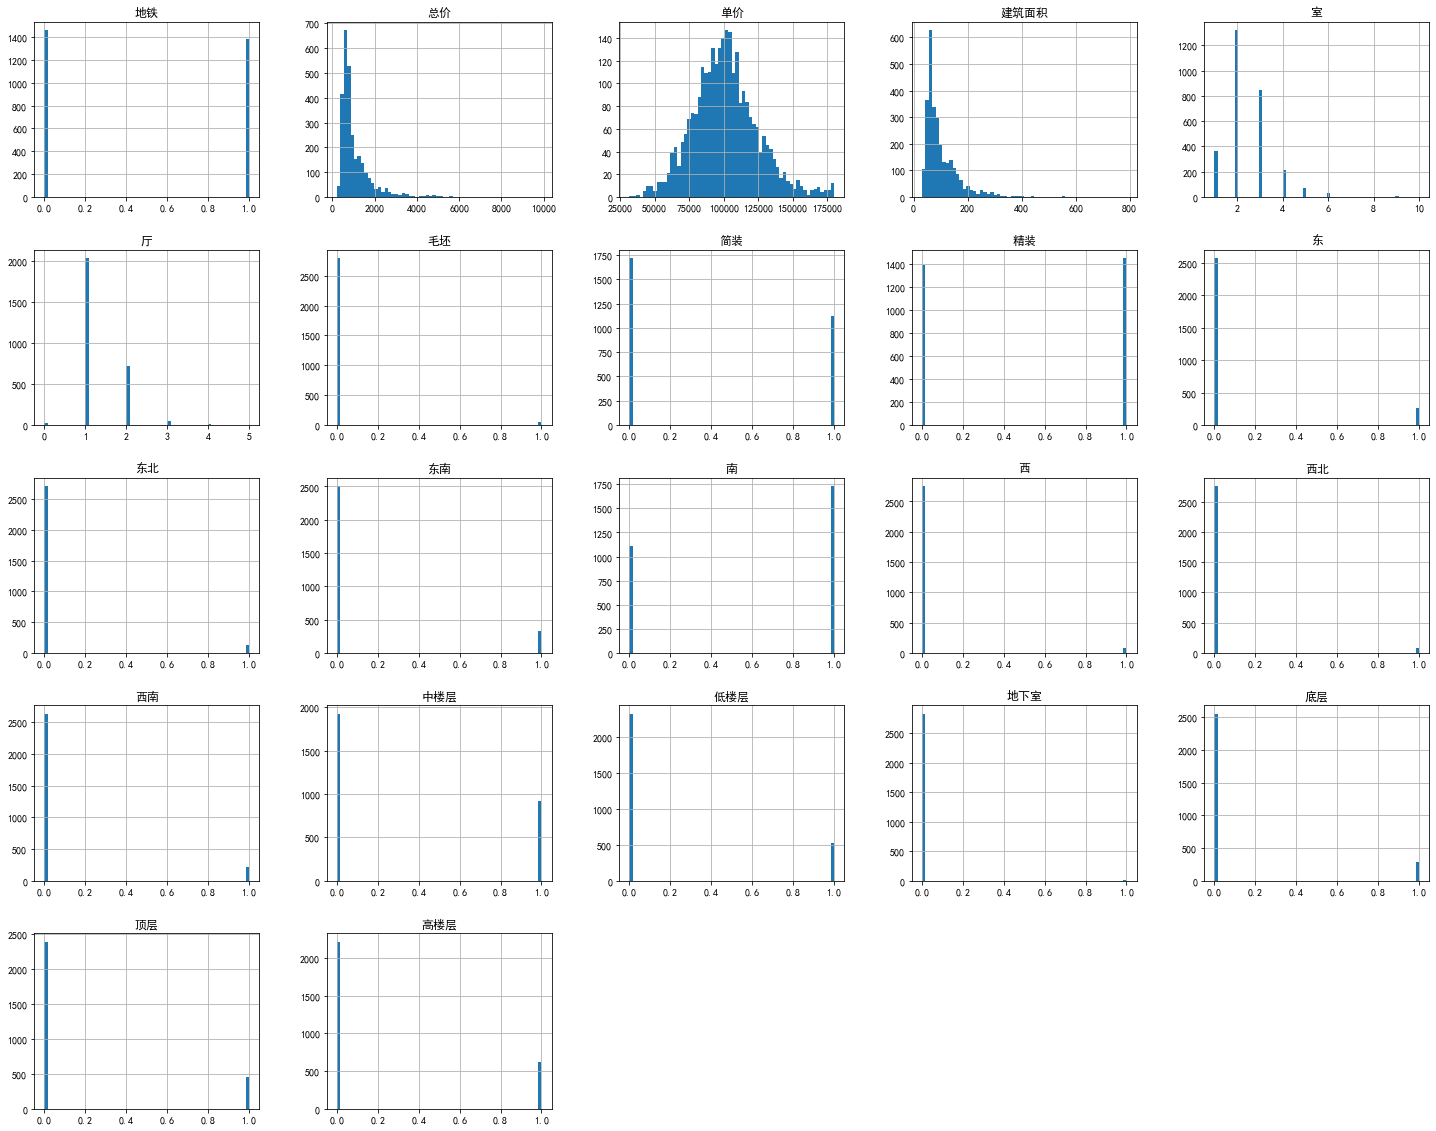

In [501]:
df.hist(bins=60) #单价正态分布

D:\Anaconda\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='单价', ylabel='Density'>

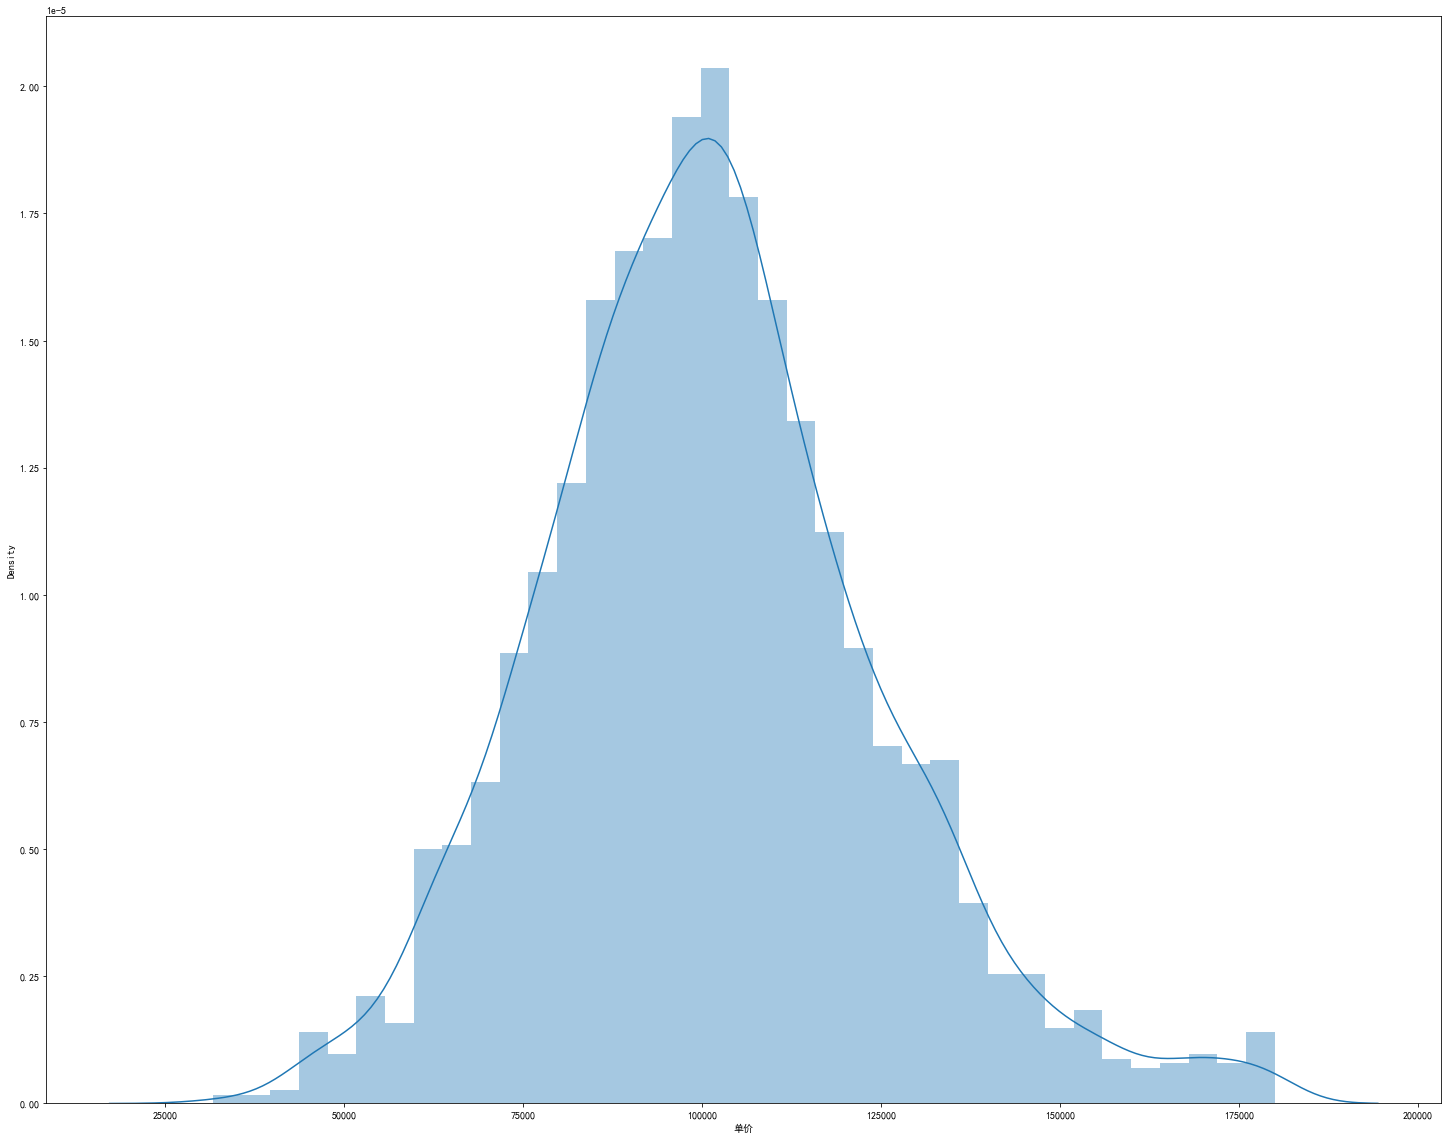

In [502]:
sns.distplot(df['单价'])

<AxesSubplot:>

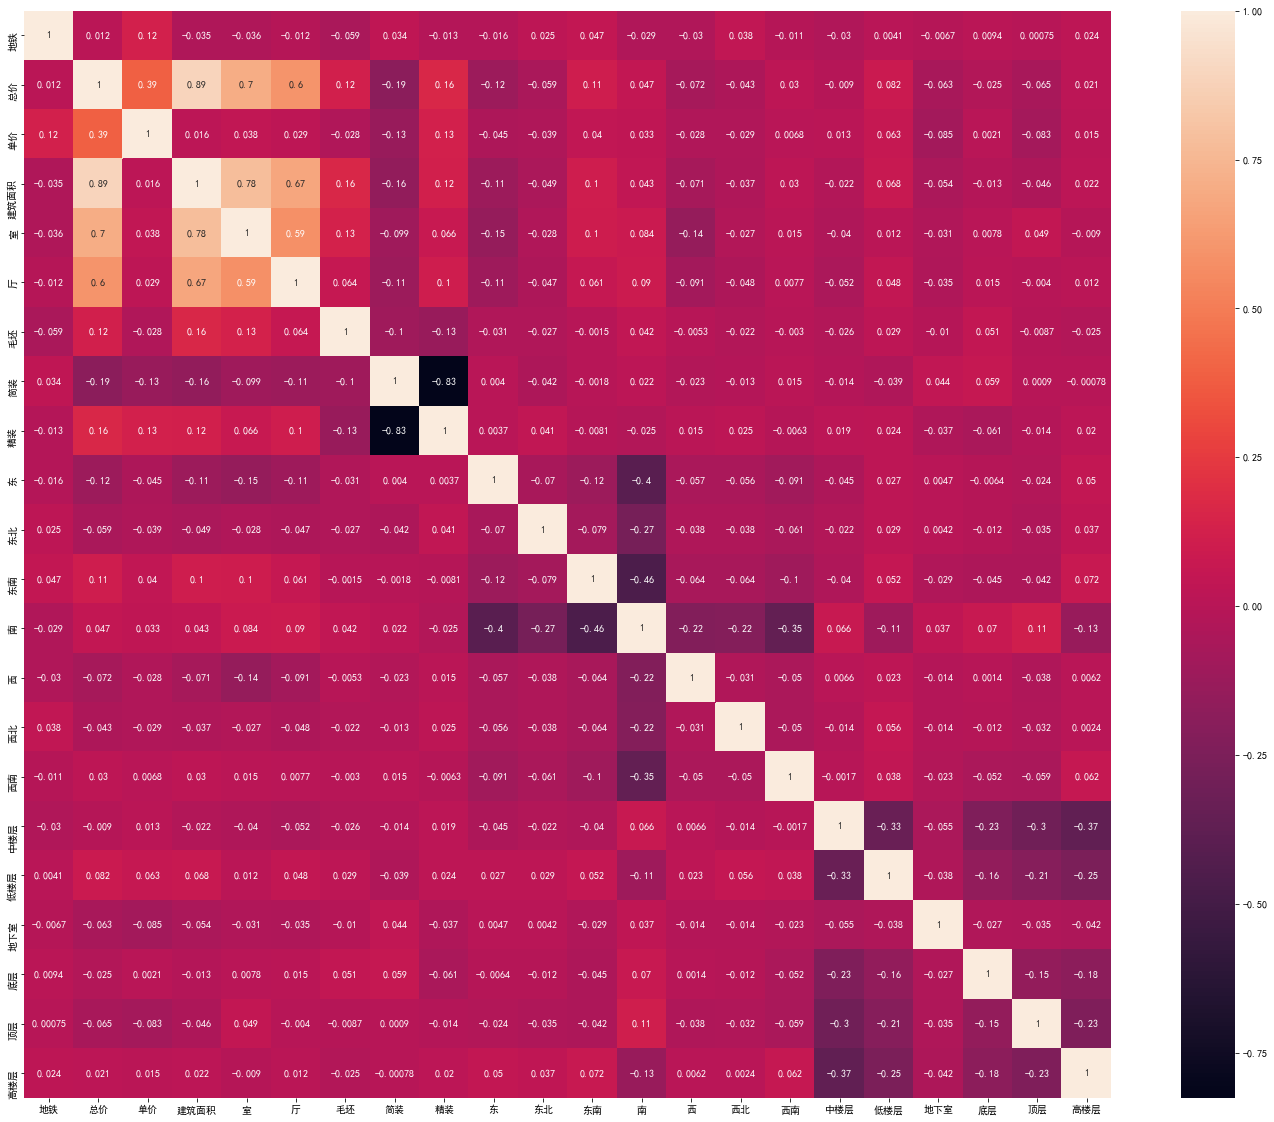

In [503]:
# 热力图进行相关性分析


# cols=['地铁', '建筑面积', '室', '厅', '毛坯', '简装', '精装', '东', '东北', '东南',
#        '南', '西', '西北', '西南', '中楼层', '低楼层', '地下室', '底层', '顶层', '高楼层']
# df1=df[cols]
sns.heatmap(df.corr(),square=True,annot=True)

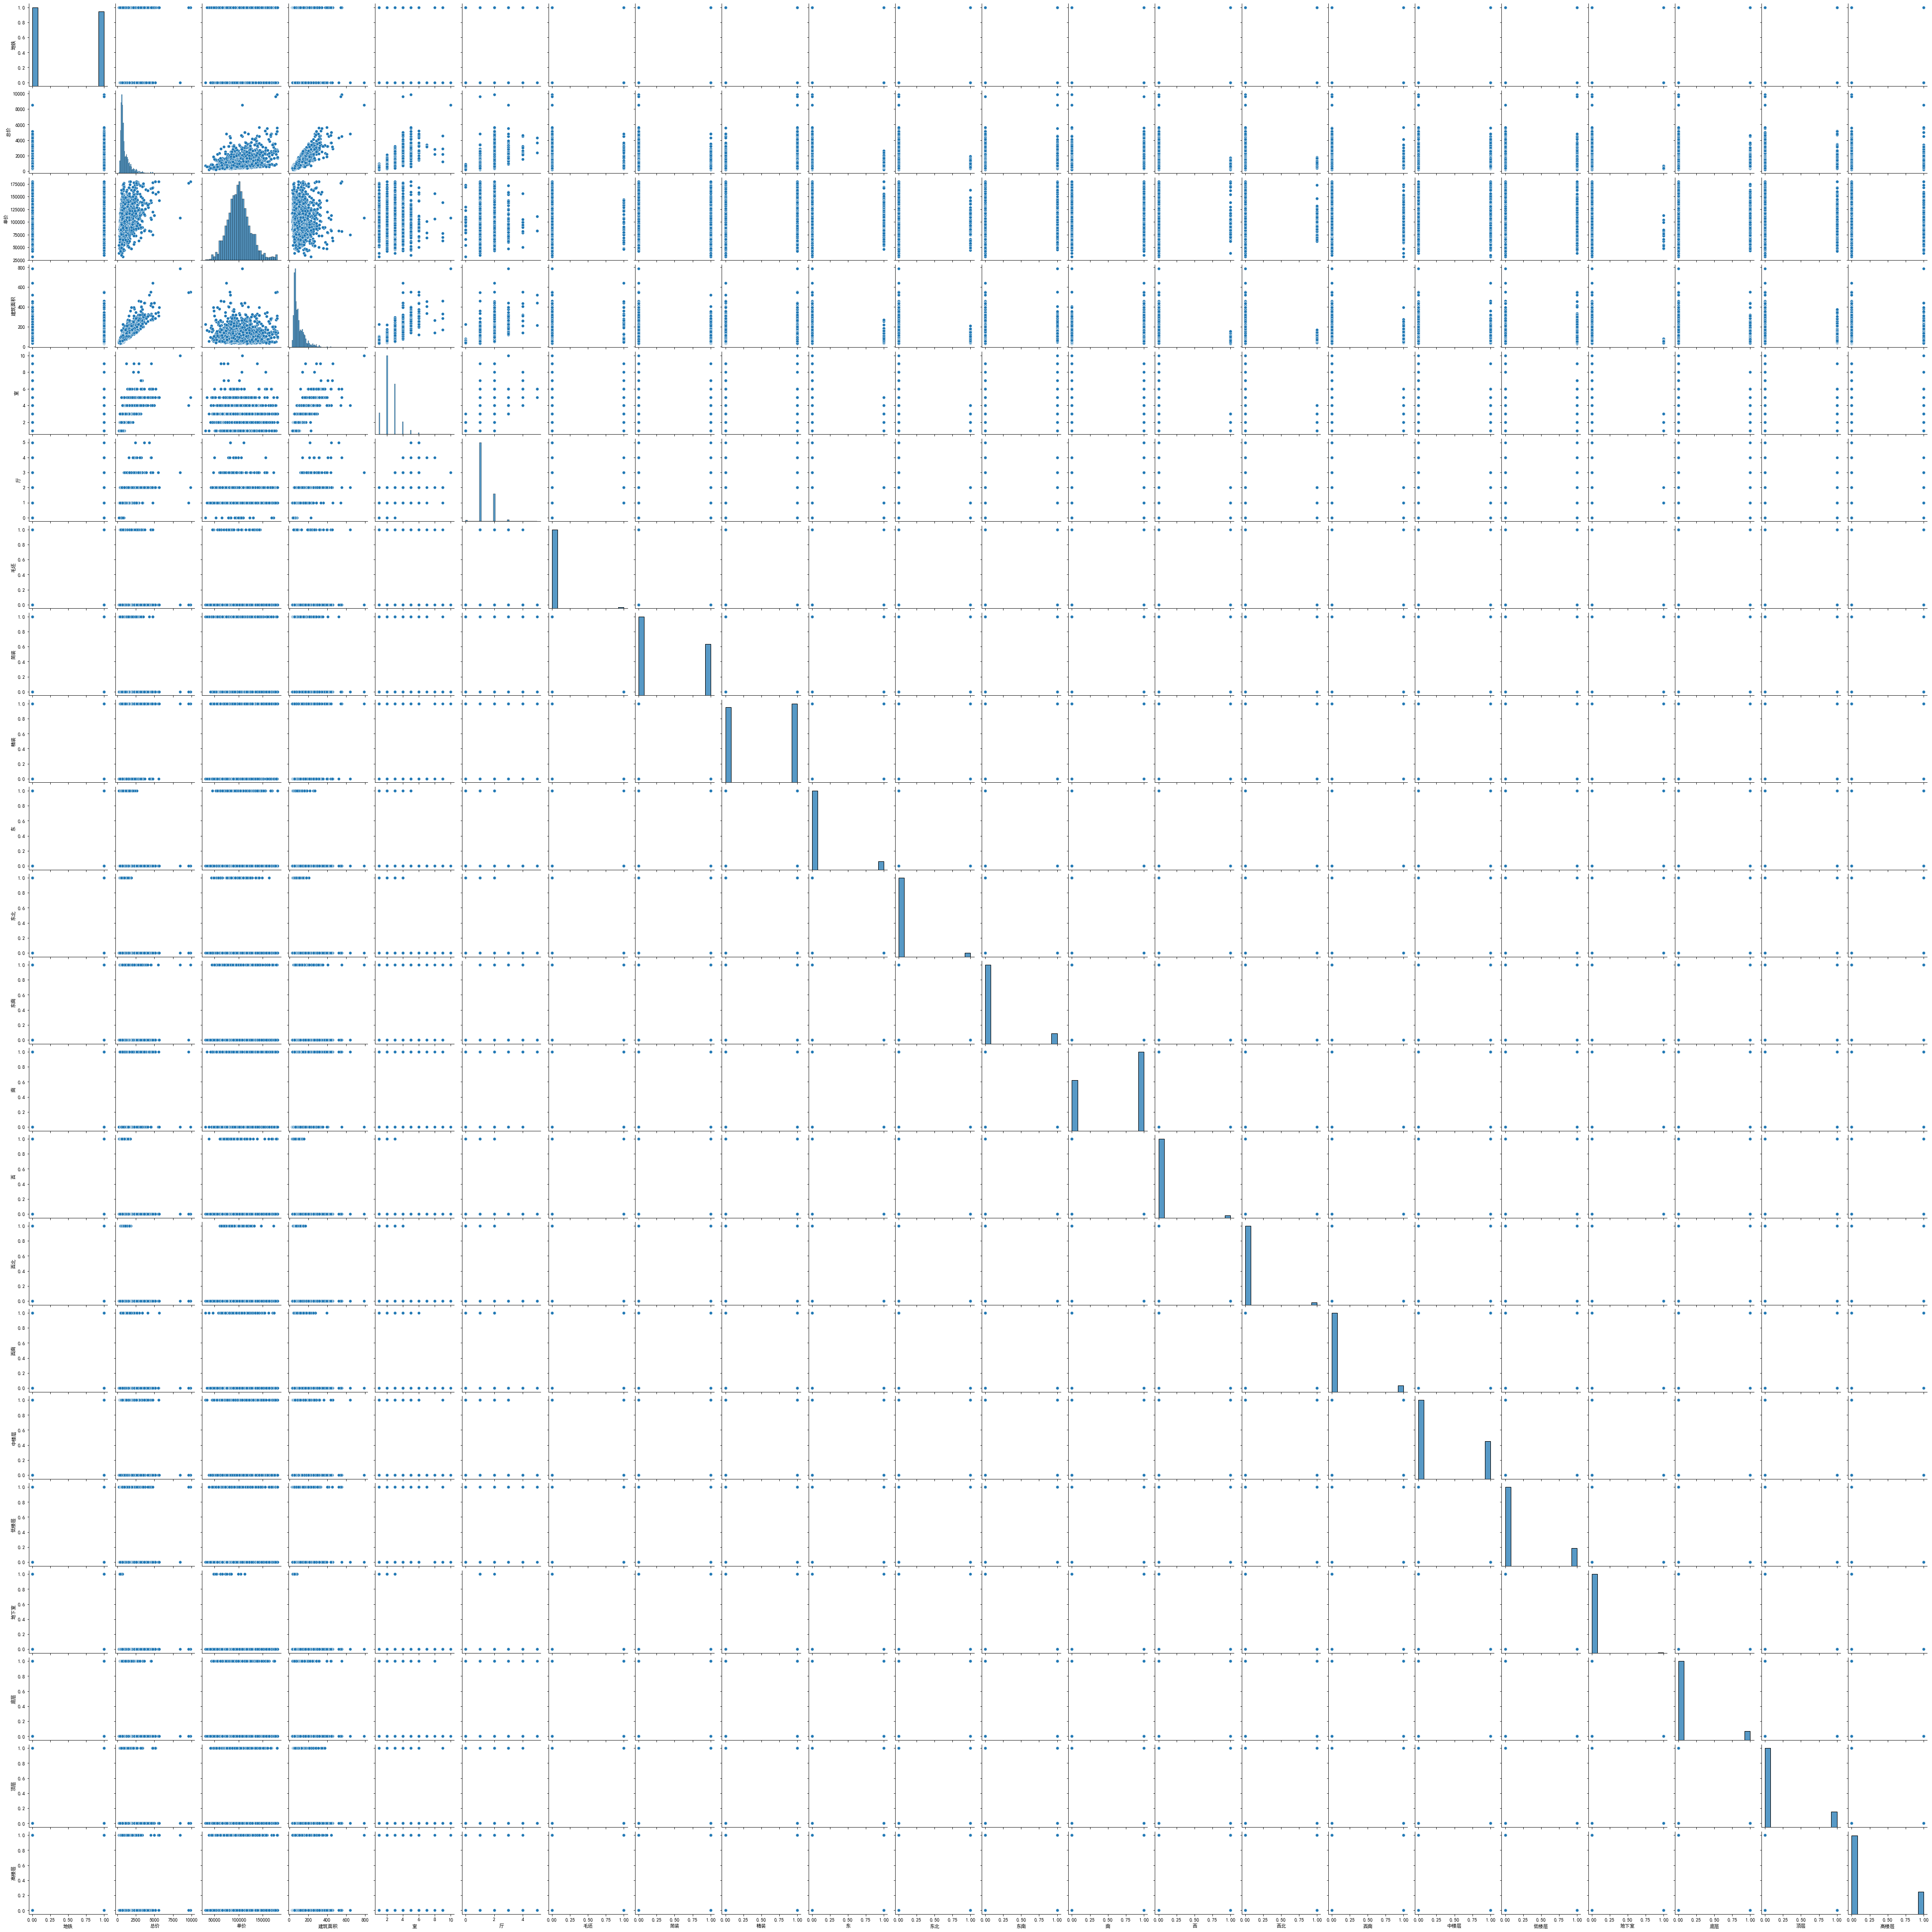

In [504]:
sns.pairplot(df)